## Praca domowa 4

#### Autor: Mikołaj Roguski

### Zadanie 1 (1.5 pkt)

Używając funkcji z pakietu `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o grach.

a) Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie.  

b) Jak rodzaj gry zarobił najwięcej w roku 2010?

c) Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny `Typ Gry` i `Średnia sprzedaż w Japonii`.


In [12]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%202%20-%20Formatowanie%20danych/Python/data/vgsales.csv",
                delimiter = ",").dropna().reset_index(drop = True)

#### a)

In [13]:
df.loc[((df.NA_Sales < df.EU_Sales) & (df.Year > 2015) & (df.Publisher == "Nintendo"))]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4199,4263,Mario & Sonic at the Rio 2016 Olympic Games,3DS,2016.0,Action,Nintendo,0.04,0.16,0.24,0.01,0.46
6477,6590,Mario & Sonic at the Rio 2016 Olympic Games,WiiU,2016.0,Action,Nintendo,0.03,0.11,0.10,0.01,0.26
14703,14971,Teddy Together,3DS,2016.0,Simulation,Nintendo,0.00,0.02,0.00,0.00,0.02


#### b)

In [14]:
df.loc[(df.Year == 2010)].groupby('Genre').Global_Sales.sum().sort_values(ascending = False).head(1)

Genre
Action    117.64
Name: Global_Sales, dtype: float64

#### c)

In [15]:
df1 = df.groupby('Genre').mean()
df1 = df1[df1.JP_Sales > df1.EU_Sales]
df1.reset_index()[['Genre','JP_Sales']].rename(columns = {'Genre':'Typ Gry', 'JP_Sales':'Średnia sprzedaż w Japonii'}).sort_values(by = 'Średnia sprzedaż w Japonii',ascending = False)


,Typ Gry,Średnia sprzedaż w Japonii
1,Role-Playing,0.238293
0,Puzzle,0.099439
2,Strategy,0.073284


### Zadanie 2 (3.5 pkt)

Wykorzystując narzędzie do wizualizacji w Pythonie (matplotlib, seaborn) należy poprawić wykres, który był rozwiązaniem pracy domowej 2 (najlepiej poprawić swoją pracę domową, ale można też cudzą).

Rozwiązanie powinno zawierać:

1) oryginalny wykres wraz ze źródłem

2) wykres w ggplot2 wraz z linkiem do pracy domowej w której się on pojawił (kod nie jest potrzebny)

3) poprawiony wykres z punktu 2) w Pythonie

4) uzasadnienie, czemu wykres w Pythonie jest lepszy od dwóch pozostałych.



## oryginalny wykres
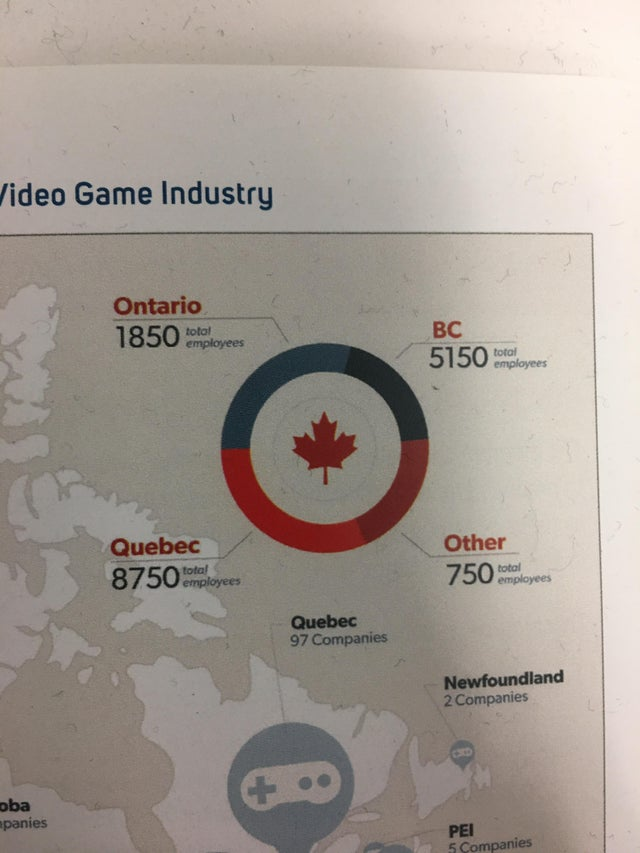
[https://www.reddit.com/r/dataisugly/comments/qh0tnn/this_caught_my_eye_in_my_school/](https://www.reddit.com/r/dataisugly/comments/qh0tnn/this_caught_my_eye_in_my_school/)



## poprawiony wykres w ggplot-cie
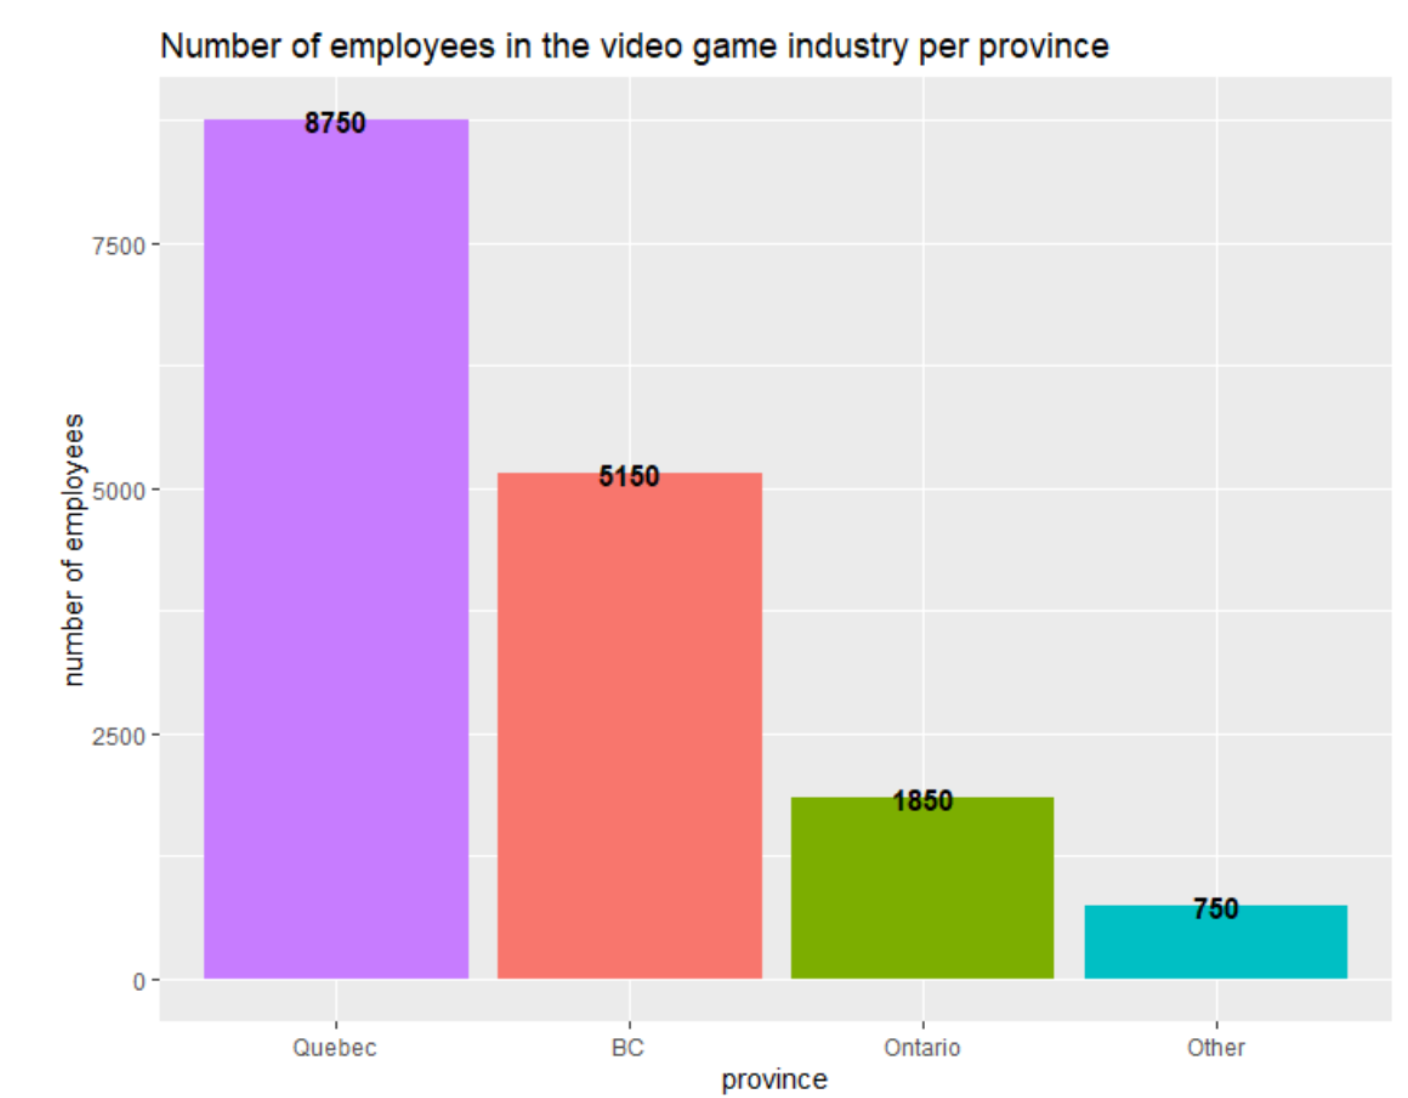
[https://github.com/dyrewucktv/2022Z-DataVisualizationTechniques/tree/main/homeworks/hw2/RoguskiMikolaj](https://github.com/dyrewucktv/2022Z-DataVisualizationTechniques/tree/main/homeworks/hw2/RoguskiMikolaj)

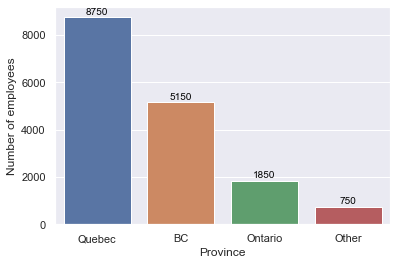

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.DataFrame({'Province':['Quebec','BC','Ontario','Other'], 'Number of employees':[8750,5150,1850,750]})
sns.set_theme()
plt.figure()
wykres = sns.barplot(x = data['Province'], y = data['Number of employees'])
for p in wykres.patches:
    wykres.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

## Uzasadnienie
wykres wykonany w pythonie jest dużo lepszy od wykresu pierwszego, ze względu na jego czytelność, możliwość wizualnego porównania wartości oraz walory estetyczne. Od wykresu wykonanego w R-rze ostatni wykres jest łądniejszy, oraz ze względu na wybór czcionki łatwiejszy do odczytania.